# Analyzing COVID-19 in the United States and Its Impact

Throughout the final unit we have explored COVID-19 and its spread throughout the world. 

The visualizations in this notebook will focus on and explore its impact on the United States.

In [ ]:
#Import all libraries you may need in this cell:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
%matplotlib inline

## 1 - Finding the COVID-19 numbers per state.

In [ ]:
#3 lists of data compiled for your convenience

#List of states sorted in alphabetical order.
statesList = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

#Corresponding latitudes for each state.
latitudes = [32.361538, 58.301935, 33.448457, 34.736009, 38.555605, 39.7391667, 41.767, 39.161921, 30.4518, 33.76,
            21.30895, 43.613739, 39.783250, 39.790942, 41.590939, 39.04, 38.197274, 30.45809, 44.323535, 38.972945,
            42.2352, 42.7335, 44.95,32.320, 38.572954,46.595805,40.809868,39.160949,43.220093, 40.221741,35.667231,
            42.659829,35.771, 48.813343,39.962245, 35.482309,44.931109, 40.269789, 41.82355, 34.000,  44.367966,36.165,
            30.266667,40.7547,44.26639, 37.54, 47.042418,38.349497,43.074722, 41.145548]

#Corresponding longitudes for each state.
longitudes = [-86.279118,-134.419740,-112.073844, -92.331122,-121.468926 ,-104.984167 ,-72.677 , -75.526755 ,
              -84.27277,-84.39,-157.826182 ,-116.237651 ,-89.650373 ,-86.147685 ,-93.620866 ,-95.69 , -84.86311
              ,-91.140229 ,-69.765261 ,-76.501157 ,-71.0275 ,-84.5467 , -93.094 ,-90.207 , -92.189283
              , -112.027031 ,-96.675345 ,-119.753877 ,-71.549127 , -74.756138, -105.964575 , -73.781339 ,-78.638 
              ,-100.779004 ,-83.000647 , -97.534994,-123.029159 ,-76.875613 , -71.422132, -81.035, -100.336378
              ,-86.784 ,-97.75 ,-111.892622 ,-72.57194 ,-77.46 ,-122.893077 ,-81.633294 ,-89.384444 ,-104.802042]
stateAbbreviationList = ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI",
                         "ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT",
                         "NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI",
                         "SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"]

Use the New York Times' COVID-19 data(https://github.com/nytimes/covid-19-data/blob/master/us-states.csv) to create **two functions** that takes the name of a state as input and returns the bar plots of 1) # of cases over time and 2) # of deaths over time for that specific state.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [ ]:
def cases_state(state):
  df_cases = df.loc[df["state"] == state] 
  
  fig = plt.figure()
  ax = fig.add_axes([0,0,2,2]) #starting point on x, starting point on y, length and width
  dates = df_cases["date"] # x values
  data = df_cases["cases"] # y values

  plt.plot(dates,data, color="Darkorange")
  plt.bar(dates, data, color="Darkorange")
  ax.xaxis.set_major_locator(plt.MaxNLocator(5))# edits ax to not showing each date
  plt.xlabel("Dates")
  plt.ylabel("# of cases ")
  plt.title("Covid-19 cases Over Time ("+ state +")")

In [ ]:
def deaths_state(state):
  df_deaths = df.loc[df["state"] == state] 
  
  fig = plt.figure()
  ax = fig.add_axes([0,0,2,2]) #starting point on x, starting point on y, length and width
  dates = df_deaths["date"] # x values
  data = df_deaths["deaths"] # y values

  plt.plot(dates,data, color="tomato")
  plt.bar(dates, data, color="tomato")
  ax.xaxis.set_major_locator(plt.MaxNLocator(5))
  plt.xlabel("Dates")
  plt.ylabel("# of deaths ")
  plt.title("Covid-19 deaths Over Time ("+ state +")")

Call the functions on your assigned state to visualize the data.

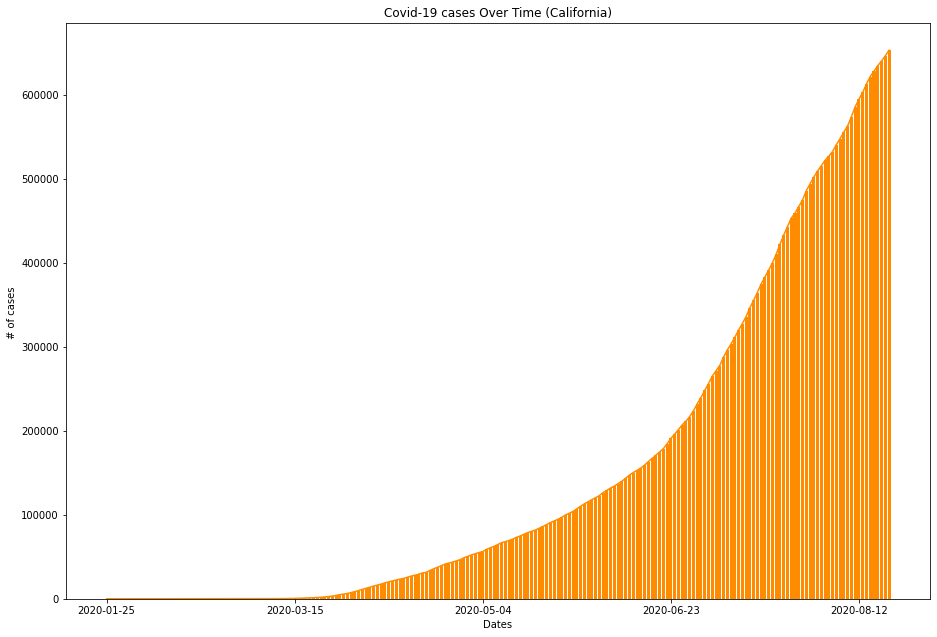

In [ ]:
cases_state("California")

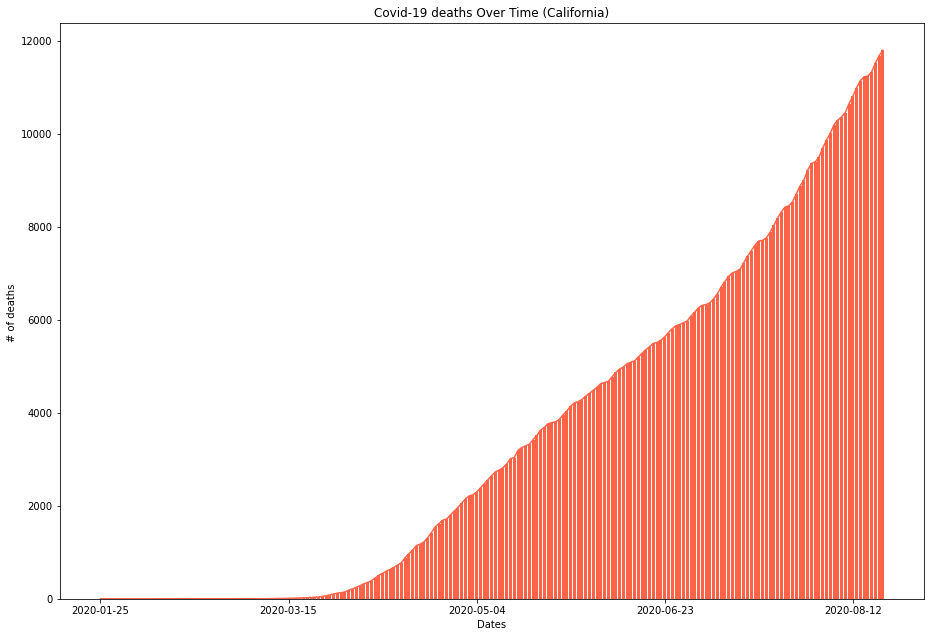

In [ ]:
deaths_state("California")

Use New York Times' COVID-19 data(https://github.com/nytimes/covid-19-data/blob/master/us-states.csv) to create a choropleth map of the United States based on its numbers of COVID-19 cases and deaths. (Use colors that you think are appropriate).

In [ ]:
df_covid = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df_covid.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [ ]:
#Dataframe Formatter
def dfFormatter(df, selectColumn):
    #Separate df_formatted from df. Create list of states and their latitudes and longitudes.
    df_formatted = pd.DataFrame(statesList, columns = ['state'])
    df_formatted['lat'] = latitudes
    df_formatted['long'] = longitudes
    
    #Create columns for each date, start off by zeroing out everything.
    #previousDate = datetime.datetime(2020, 1, 1) #Commented out because datetime is no longer a type.
    previousDate = "2020-01-01"
    for i in range(len(df['date'])):
        if df['date'][i] != previousDate:
            df_formatted[df['date'][i]] = 0

    #Set index to states temporarily.
    df_formatted.set_index('state', inplace=True)

    
    #Select which data you want to use based on the column that you are plotting (cases or deaths)
    if selectColumn == 'cases':
        #Get number of cases from df and put them in df_formatted.  
        for i in range(len(df['state'])):
            df_formatted.loc[df['state'][i], df['date'][i]] = df['cases'][i]
            #Format for .loc : df_formatted.loc['index/row label', 'column label'] = 'value'
    elif selectColumn == 'deaths':
        for i in range(len(df['state'])):
            df_formatted.loc[df['state'][i], df['date'][i]] = df['deaths'][i]
            #Format for .loc : df_formatted.loc['index/row label', 'column label'] = 'value'

    
    #Reset index when done so that state becomes a column without being the index.
    df_formatted.reset_index(inplace=True)
    
    #Drop last 5 rows because we are focusing on the 50 states.
    df_formatted.drop([50,51,52,53,54], inplace=True)
        
    return df_formatted

In [ ]:
#Call the function and assign what it returns to the dataframe variables you will be using.
state_cases=dfFormatter(df_covid,"cases")
#print(state_cases)

In [ ]:
state_deaths = dfFormatter(df_covid,"deaths")

In [ ]:

total_lists =state_cases.groupby('state')["2020-08-20"].sum().tolist()

state_lists = state_cases["state"].tolist()
state_sets = set(state_lists)
state_lists = list(state_sets)
state_lists.sort()

new_dfs = pd.DataFrame(list(zip(state_lists, total_lists)), 
              columns =['state',"cases"])

colors = ["#F7F1F0", "#FFFFD7", "#FAFAA9", "#FAE1A9",  "#FFD67A", "#FFC84B", "#FFA74B",
        "#FF9424 ", "#FF7324", "#FF6A16", "#FF4716",  "#FF3F0C", "#FE3803", "#FE1603",
        "#E91200", "#C30F00", "#AC0000", "#9A0101",  "#8D0202", "#7C0000", "#6D0000" ]

fig = go.Figure(data = go.Choropleth(
    locationmode = "USA-states",
    locations = stateAbbreviationList,
    z = new_dfs["cases"],
    colorscale = colors, 
    reversescale = False,
    autocolorscale = False,
    colorbar_title = "# of COVID-19 cases nationwide "))
fig.update_layout(
    title_text = "# of COVID-19 cases nationwide ",
    geo = dict(showcoastlines = True,scope = "usa"))
fig.show()

In [ ]:

total_lists =state_deaths.groupby('state')["2020-08-20"].sum().tolist()

state_lists = state_deaths["state"].tolist()
state_sets = set(state_lists)
state_lists = list(state_sets)
state_lists.sort()

new_dfs = pd.DataFrame(list(zip(state_lists, total_lists)), 
              columns =['state',"deaths"])

colors = ["#F7F1F0", "#FFFFD7", "#FAFAA9", "#FAE1A9",  "#FFD67A", "#FFC84B", "#FFA74B",
        "#FF9424 ", "#FF7324", "#FF6A16", "#FF4716",  "#FF3F0C", "#FE3803", "#FE1603",
        "#E91200", "#C30F00", "#AC0000", "#9A0101",  "#8D0202", "#7C0000", "#6D0000" ]

fig = go.Figure(data = go.Choropleth(
    locationmode = "USA-states",
    locations = stateAbbreviationList,
    z = new_dfs["deaths"],
    colorscale = colors, 
    reversescale = False,
    autocolorscale = False,
    colorbar_title = "# of COVID-19 deaths nationwide "))
fig.update_layout(
    title_text = "# of COVID-19 deaths nationwide ",
    geo = dict(showcoastlines = True,scope = "usa"))
fig.show()

## 2 - Analyzing Its Impact on the United States

Group 3 -

The United States population is over 300 million, and numbers can be more meaningful when put into other perspectives. Using the following dataset from ourworldindata.org(https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv), create a bar plot for the number of total cases per million people and a bar plot for new cases per million people.

In [ ]:
df_per = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
df_per.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,18.733,18.733,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,37.465,18.733,2.676,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29


<function matplotlib.pyplot.show>

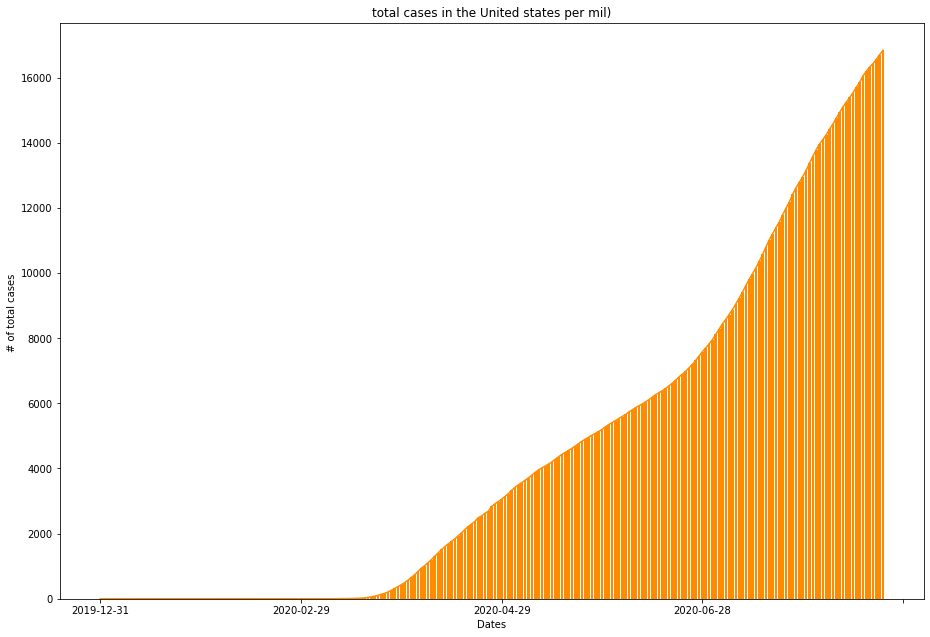

In [ ]:
df_total_cases = df_per.loc[df_per["location"] == "United States"] 
#df_total_cases.head()
fig = plt.figure()
ax = fig.add_axes([0,0,2,2]) #starting point on x, starting point on y, length and width
dates = df_total_cases["date"] # x values
data = df_total_cases["total_cases_per_million"] # y values

plt.plot(dates,data, color="Darkorange")
plt.bar(dates, data, color="Darkorange")
ax.xaxis.set_major_locator(plt.MaxNLocator(5))# edits ax to not showing each date
plt.xlabel("Dates")
plt.ylabel("# of total cases ")
plt.title("Total Number of Cases in the United States per mil)")
plt.show

<function matplotlib.pyplot.show>

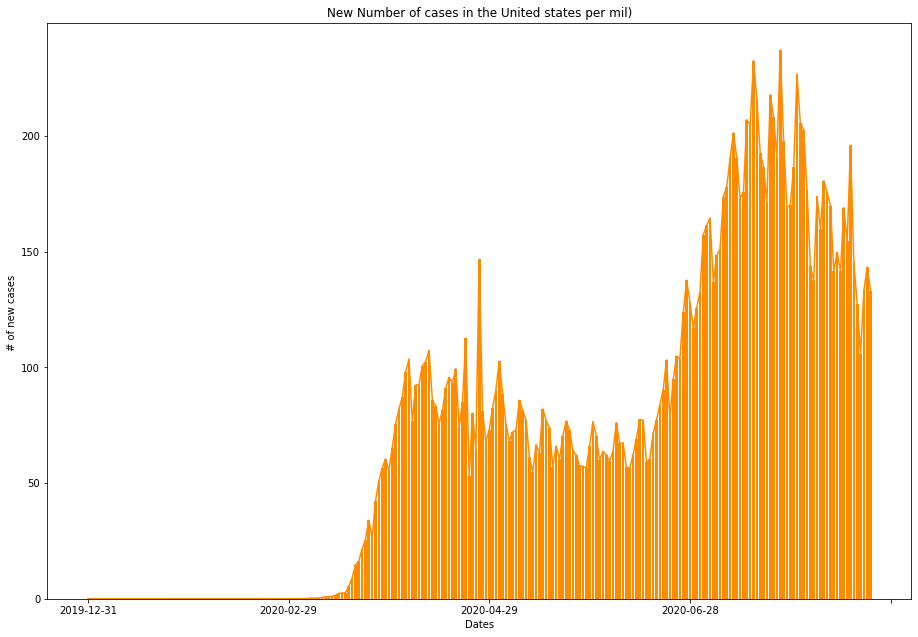

In [ ]:
df_new_cases = df_per.loc[df_per["location"] == "United States"] 
#df_total_cases.head()
fig = plt.figure()
ax = fig.add_axes([0,0,2,2]) #starting point on x, starting point on y, length and width
dates = df_new_cases["date"] # x values
data = df_new_cases["new_cases_per_million"] # y values

plt.plot(dates,data, color="Darkorange")
plt.bar(dates, data, color="Darkorange")
ax.xaxis.set_major_locator(plt.MaxNLocator(5))# edits ax to not showing each date
plt.xlabel("Dates")
plt.ylabel("# of new cases ")
plt.title("New Number of cases in the United states per mil)")
plt.show

Ratio

In [ ]:
gloabl_c=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
global_r = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [ ]:

total_list = gloabl_c.groupby('Country/Region')['8/20/20'].sum().tolist()

country_list = gloabl_c["Country/Region"].tolist()
country_set = set(country_list) #sets do not have duplicates
country_list = list(country_set)
country_list.sort()


#new_df includes the data we need to generate a choropleth map (UNIQUE country list and total cases for each country)
new_df = pd.DataFrame(list(zip(country_list, total_list)), 
               columns =['Country', 'Total cases'])

new_df.head()

,Country,Total cases
0,Afghanistan,37856
1,Albania,7967
2,Algeria,40258
3,Andorra,1024
4,Angola,2044


In [ ]:

total_list2 = global_r.groupby('Country/Region')['8/20/20'].sum().tolist()

country_list2 = global_r["Country/Region"].tolist()
country_set2 = set(country_list2) #sets do not have duplicates
country_list2 = list(country_set2)
country_list2.sort()


#new_df includes the data we need to generate a choropleth map (UNIQUE country list and total cases for each country)
new_df2 = pd.DataFrame(list(zip(country_list2, total_list2)), 
               columns =['Country', 'Total recoveries'])
new_df2.head()

,Country,Total recoveries
0,Afghanistan,27681
1,Albania,3986
2,Algeria,28281
3,Andorra,875
4,Angola,742


In [ ]:
new_df3["ratio"]= (new_df2["Total recoveries"]/new_df["Total cases"])*100
new_df3.head()

0    0.731218
1    0.500314
2    0.702494
3    0.854492
4    0.363014
dtype: object

In [ ]:
colors = ["#7DFF2C", "#8CFF45", "#A2FF69", "#BEFF69",  "#C8FF81", "#E7FF81", "#EBFCA2",
          "#FFF074 ", "#FBE747", "#FFC93B", "#FFC019",  "#FF9048", "#FF802D", "#FF7317",
          "#FE6553", "#FF5743", "#FF3820", "#FF1E03",  "#F90101", "#CF0000", "#A80000" ]

fig = go.Figure(data = go.Choropleth(
    locationmode = "country names",
    locations = new_df["Country"],
    z = new_df3["ratio"],
    colorscale = colors, 
    reversescale = True,
    autocolorscale = False,
    colorbar_title = "# of COVID-19 recoveire to cases "))
fig.update_layout(
    title_text = "# of COVID-19 recoveries to cases ",
    geo = dict(showcoastlines = True,))
fig.show()

## 3 - Challenge (optional): Find a dataset online that explores other ways that COVID-19 has impacted the United States and use pandas and Plotly to create a visualization based on it.

Some ideas:
* number of business closures in each state over time
* number of people telecommuting in the US
* number of hospitalizations in each state

etc..